In [2]:
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import xgboost as xgb
import pandas as pd
import shap
shap.initjs()

In [4]:
file_path = '../DataSets/EncodedData/encoded_data_04_24.csv'
df = pd.read_csv(file_path, sep=",", encoding="UTF-8")

X = df.drop(columns=['log_market_value_base10', "name", "market_value_in_eur"])  # Assuming 'value' is the column you want to predict
y = df['log_market_value_base10']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=2000, max_depth=7, learning_rate = 0.25, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

df.head()


,name,height_in_cm,year,goals_for,goals_against,goals,assists,red_cards,yellow_cards,minutes_played,market_value_in_eur,age_at_evaluation,log_market_value_base10,goals/90,assists/90,country_of_citizenship_encoded,sub_position_encoded,club_id_encoded,domestic_competition_id_encoded
0,Miroslav Klose,184.0,2012.75,31.0,14.0,11.0,1.0,0.0,6.0,1483.0,4000000.0,35,6.60206,0.667566,0.060688,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
1,Miroslav Klose,184.0,2013.25,24.0,15.0,5.0,2.0,0.0,2.0,1102.0,2000000.0,35,6.30103,0.408348,0.163339,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
2,Miroslav Klose,184.0,2013.75,14.0,21.0,4.0,2.0,0.0,1.0,950.0,1000000.0,36,6.00000,0.378947,0.189474,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
3,Miroslav Klose,184.0,2014.25,24.0,22.0,4.0,3.0,0.0,1.0,1270.0,1000000.0,36,6.00000,0.283465,0.212598,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
4,Miroslav Klose,184.0,2014.75,31.0,18.0,4.0,3.0,0.0,2.0,496.0,1000000.0,37,6.00000,0.725806,0.544355,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06


 99%|===================| 11949/12080 [00:37<00:00]        

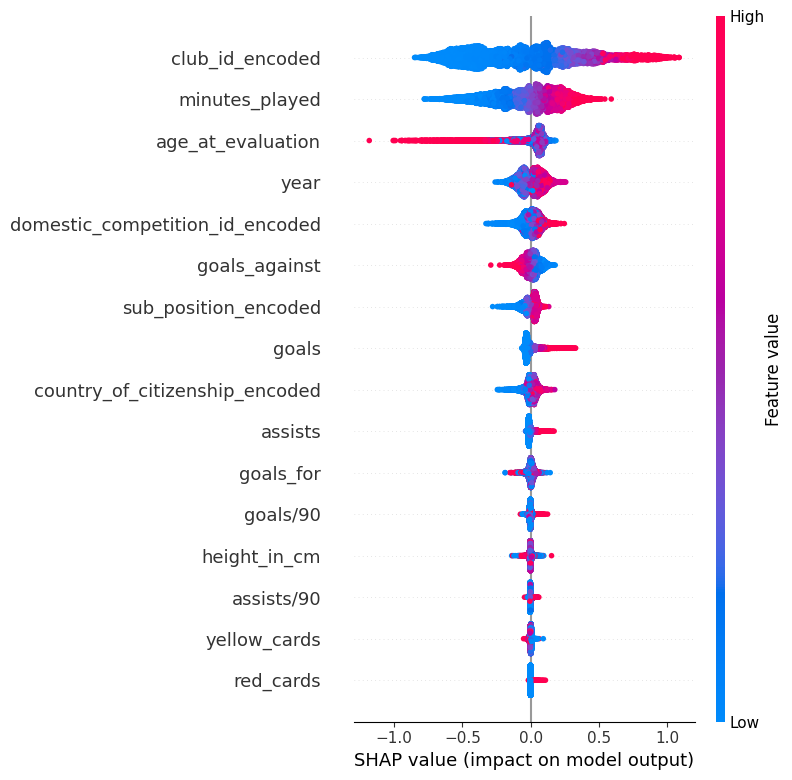

In [5]:
# Create an explainer object
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

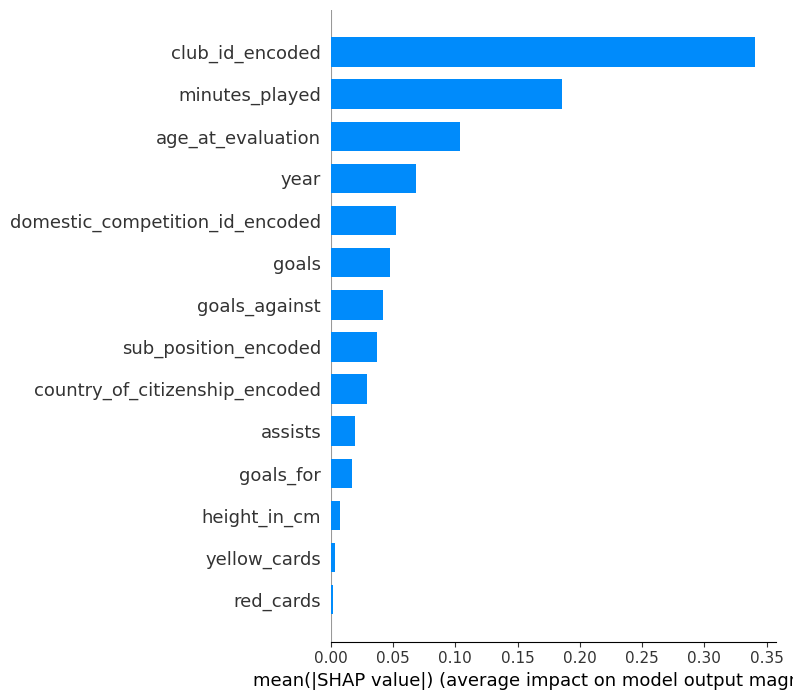

In [12]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [5]:
shap_values

array([[-1.00818766e-02,  5.73015730e-02,  8.30065092e-05, ...,
         2.52776932e-02,  2.23093637e-01,  3.31803686e-02],
       [-5.00923430e-03,  3.78443326e-02,  8.30065092e-05, ...,
         3.05668983e-02, -5.86419258e-01, -5.26023540e-02],
       [-4.37515401e-03, -1.07014822e-03,  1.74313669e-03, ...,
         3.70131496e-03, -3.77321104e-01, -2.21746235e-02],
       ...,
       [-4.37515401e-03, -6.91704897e-02,  4.51002033e-03, ...,
        -6.68193151e-03, -3.70698742e-01, -1.73103941e-02],
       [-3.10699343e-03,  2.81157124e-02,  6.17015052e-03, ...,
         2.00294179e-02,  1.77566621e-01,  3.31803686e-02],
       [ 6.97488321e-04, -8.86277301e-02, -5.45076077e-03, ...,
         8.00427497e-03, -1.42085175e-01, -3.74820083e-02]])

In [11]:
shap.plots.bar(shap_values)

NameError: name 'x' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=039d1f4a-fb47-4bbf-8592-3573ff918cac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>